# Task 02


## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV file

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")

# Data Summary

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Handling missing values
data.dropna(subset=["Embarked"], inplace=True)
data["Cabin"].fillna("Unknown", inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [21]:
#Removing irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# Checking duplicates
data.duplicated().sum()

np.int64(0)

# Data Analysis

## Survival rate Distrbution

Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64


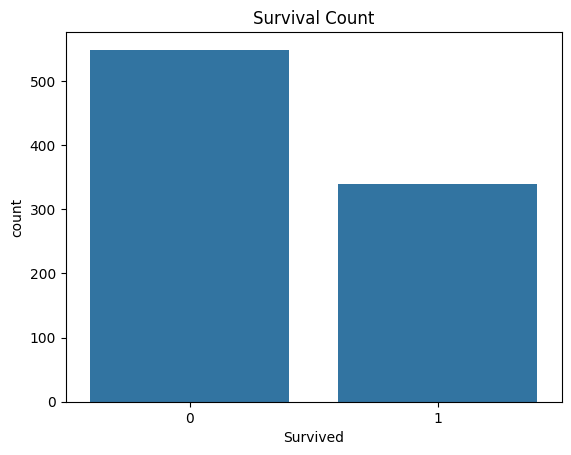

In [27]:
# Percentage of survivors
print(data['Survived'].value_counts(normalize=True) * 100) #0 for died and 1 for survived

# Count of survivors vs non-survivors
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


##  Passenger Class Distribution

Passenger Count by Class (Unsorted):
Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Passenger Count by Class (Sorted):
Pclass
1    214
2    184
3    491
Name: count, dtype: int64

Passenger Count in Each Class (Renamed):
Pclass
1st Class    214
2nd Class    184
3rd Class    491
Name: count, dtype: int64


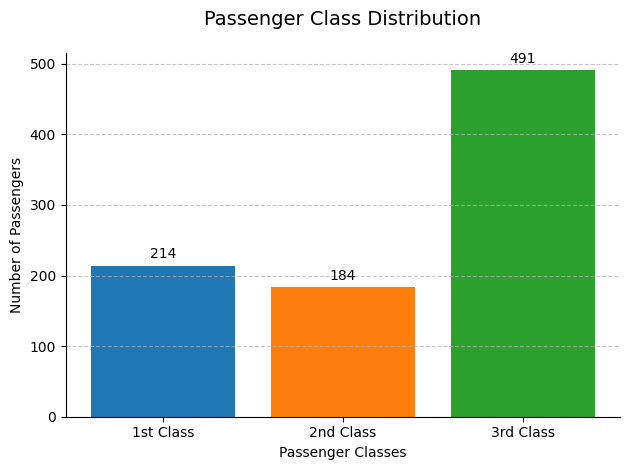

In [35]:
# Count of Passengers in each class
Pclass_count = data['Pclass'].value_counts()
print("Passenger Count by Class (Unsorted):")
print(Pclass_count)

# Sort the index in ascending order
Pclass_count_sorted = Pclass_count.sort_index()
print("\nPassenger Count by Class (Sorted):")
print(Pclass_count_sorted)

# Rename the index values for better readability
Pclass_count_sorted.index = Pclass_count_sorted.index.map({1: "1st Class", 2: "2nd Class", 3: "3rd Class"})
print("\nPassenger Count in Each Class (Renamed):")
print(Pclass_count_sorted)

# Add labels and title
fig, ax = plt.subplots()
ax.set_title("Passenger Class Distribution", fontsize=14, pad=20)
ax.set_ylabel("Number of Passengers", fontsize=10)
ax.set_xlabel("Passenger Classes", fontsize=10)

# Add data labels on top of each bar
bars = ax.bar(Pclass_count_sorted.index, Pclass_count_sorted.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Age Distribution

In [16]:
data["Age"].describe()

count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64

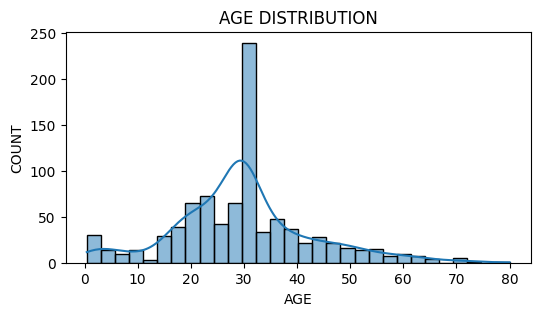

In [17]:
#Plotting Age Distribution
plt.figure(figsize=(6,3))
sns.histplot(data["Age"], kde=True)
plt.title("AGE DISTRIBUTION")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.show()

## Gender Distribution

In [ ]:
# count the passengers in each gender
print("\nGender Count")
data["Sex"].value_counts()

C:\Users\khan\AppData\Local\Temp\ipykernel_7320\3802294289.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survived", loc="upper right")


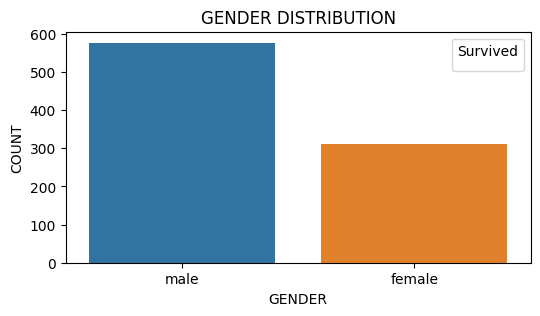

In [20]:
#Plotting Gender Distribution
plt.figure(figsize=(6,3))
sns.countplot(data=data, x="Sex", hue="Sex")
plt.title("GENDER DISTRIBUTION")
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.legend(title="Survived", loc="upper right")
plt.show()

## Correlation Between Variables

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.335549 -0.074513 -0.034040  0.083151  0.255290
Pclass   -0.335549  1.000000 -0.328256  0.081656  0.016824 -0.548193
Age      -0.074513 -0.328256  1.000000 -0.231908 -0.178013  0.088780
SibSp    -0.034040  0.081656 -0.231908  1.000000  0.414542  0.160887
Parch     0.083151  0.016824 -0.178013  0.414542  1.000000  0.217532
Fare      0.255290 -0.548193  0.088780  0.160887  0.217532  1.000000


<Figure size 700x500 with 0 Axes>

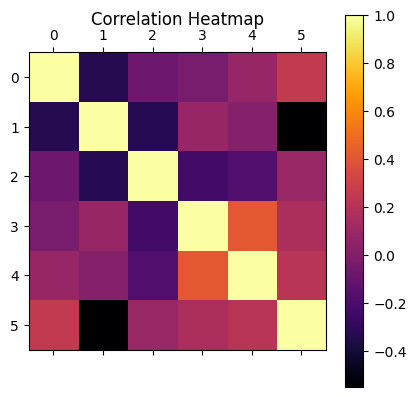

In [43]:
# Select only numeric columns for correlation calculation
numeric_df = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()
print(correlation)  # Print correlation matrix

# Plot heatmap
plt.figure(figsize=(7, 5))  # Set figure size
plt.matshow(correlation, cmap='inferno')  # Plot the matrix
plt.title('Correlation Heatmap', pad=20)
plt.colorbar()
plt.show()